In [0]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import cv2
import earthpy.plot as ep
import code
import os
from PIL import Image

In [0]:
def get_tile(image, row, col, tile_size, ds_size):
	hr = image[row*tile_size: (row+1)*tile_size, col*tile_size: (col+1)*tile_size, ...]
	ds = cv2.resize(hr, dsize=(ds_size, ds_size), interpolation=cv2.INTER_LINEAR)
	return(hr, ds)

In [0]:
"""
ds_size :  num of pixels in the side of the desired subsampled image
multiplier: multiplier from sumsapled image to HR image
"""
def get_tiles(image, ds_size=20, multiplier=4, black_threshold=0.1):
  tile_size = ds_size * multiplier
  pixel_size = np.min(image.shape[:-1])
  num_tiles = pixel_size//tile_size
  tiles = []
  for row in range(num_tiles):
    for col in range(num_tiles):
      tile = get_tile(image, row, col, tile_size, ds_size)
      if np.count_nonzero(tile[0]) / tile[0].size > 1 - black_threshold:
        tiles.append(tile)

  return tiles

In [0]:
def read_image(img_path):
  img = rio.open(img_path)

  band1 = np.expand_dims(img.read(1), axis=0)
  band2 = np.expand_dims(img.read(2), axis=0)
  band3 = np.expand_dims(img.read(3), axis=0)
  im = np.concatenate((band1, band2, band3), axis=0).transpose((1, 2, 0))
  return im

In [0]:
def output_tiles(base_path, tiles):
  for i, (hr, ds) in enumerate(tiles):
    np.save(os.path.join(base_path, 'hr_tiles', 'hr_{}.npy'.format(i)), hr)
    np.save(os.path.join(base_path, 'ds_tiles', 'ds_{}.npy'.format(i)), ds)

  print('wrote {} files to {}'.format(len(tiles), base_path))

In [6]:
base_path = '/Users/canrobins13/Desktop/landsat_8'
img_paths = [os.path.join(base_path, 'original_imgs', 'landsat_{}.tif').format(i) for i in range(1, 9)]

tiles = []
for img_path in img_paths:
  im = read_image(img_path)
  # ep.plot_rgb(im.transpose(2, 0, 1))
  im_tiles = get_tiles(im, ds_size=40, multiplier=4)
  tiles.extend(im_tiles)

output_tiles(base_path, tiles)

wrote 12474 files to /Users/canrobins13/Desktop/landsat_8


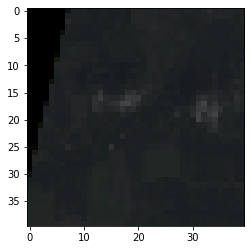

In [7]:
_img = Image.fromarray((tiles[0][1] / 65535.0 * 255).astype(np.uint8), 'RGB')
plt.imshow(_img)

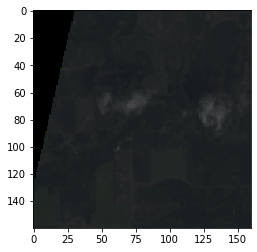

In [8]:
_img = Image.fromarray((tiles[0][0] / 65535.0 * 255).astype(np.uint8), 'RGB')
plt.imshow(_img)